# Introduction

## Background

The advent of online hotel reservation platforms has revolutionized the way bookings are made and influenced customer behavior significantly. A considerable portion of hotel reservations is canceled due to various reasons such as changes in plans or scheduling conflicts. The availability of free or low-cost cancellation options has made this process more convenient for guests, but it poses challenges for hotels as it can lead to decreased revenue and is generally less favorable for them to manage.

## Key Terms and Abbreviations

### Key Terms

- **Dataframe** is two-dimensional, size-mutable, potentially heterogeneous tabular data. (Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
- **Linear regression** model the relationship between two variables by fitting a linear equation to observed data. One variable is an explanatory variable, and the other is a dependent variable. (Source: http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm)
- **Dummy variable** takes a binary value (0 or 1) to indicate the absence or presence of some categorical effect that may be expected to shift the outcome.(Source: Draper, N.R.; Smith, H. (1998) Applied Regression Analysis, Wiley. ISBN 0-471-17082-8 (Chapter 14))
- **Variance Inflation Factor (VIF)** is measure of multicollinearity among the independent variables in a multiple regression model. (Source: https://www.investopedia.com/terms/v/variance-inflation-factor.asp#:~:text=A%20variance%20inflation%20factor%20(VIF)%20is%20a%20measure%20of%20the,adversely%20affect%20the%20regression%20results.)
- **Bootstrapping** is a resampling method uses random sampling with replacement to assigns measures of accuracy (bias, variance, confidence intervals, prediction error, etc.) to sample estimates.(Source: https://archive.ph/20120712124533/http://lib.stat.cmu.edu/S/bootstrap.funs)
- **Train Test Split** is a model validation process that allows you to simulate how your model would perform with new data. (https://builtin.com/data-science/train-test-split)
- **Permutation** is the shuffling of observed data to determine how unusual an observed outcome is (Source: https://www.statistics.com/glossary/permutation-tests/)
- **Cross-validation** is a technique for evaluating a machine learning model and testing its performance to develop a more generalized model which can perform well on unseen data. (Source: https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right & https://towardsdatascience.com/k-fold-cross-validation-explained-in-plain-english-659e33c0bc0)

### Attributes Used in Analysis

- **Booking ID** is a unique identifier of each booking
- **Meal Plan** is type of meal plan booked by the customers

## Research Question

Is it possible to predict if the customer is going to honor the reservation or cancel it?

Is it possible to predict if the customer make the reservation online or offline?

## Preregistration Statement

## Finding

# Data Description

The dataset is gained from Kaggle with the link: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data. It is data collected from two hotels in Portugal.

- **Booking_ID**: unique identifier of each booking
- **no_of_adults**: Number of adults
- **no_of_children**: Number of Children
- **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **no_of_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **type_of_meal_plan**: Type of meal plan booked by the customer:
    - Not Selected – No meal plan selected
    - Meal Plan 1 – Breakfast
    - Meal Plan 2 – Half board (breakfast and one other meal)
    - Meal Plan 3 – Full board (breakfast, lunch, and dinner)
- **required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1- Yes)
- **room_type_reserved**: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- **lead_time**: Number of days between the date of booking and the arrival date
- **arrival_year**: Year of arrival date
- **arrival_month**: Month of arrival date
- **arrival_date**: Date of the month
- **market_segment_type**: Market segment designation.
- **repeated_guest**: Is the customer a repeated guest? (0 - No, 1- Yes)
- **no_of_previous_cancellations**: Number of previous bookings that were canceled by the customer prior to the current booking
- **no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer prior to the current booking
- **avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- **no_of_special_requests**: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- **booking_status**: Flag indicating if the booking was canceled or not.

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [4]:
df['arrival_date']= pd.to_datetime(df[['arrival_year', 'arrival_month', 'arrival_date']].\
                                   rename({'arrival_year':'year', 'arrival_month':'month', 'arrival_date':'day'}, axis=1), 
                                   errors='coerce')
df = df.drop(['arrival_year', 'arrival_month'], axis=1)

In [5]:
numeric_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 
                'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                'avg_price_per_room', 'no_of_special_requests', 'arrival_date']
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']

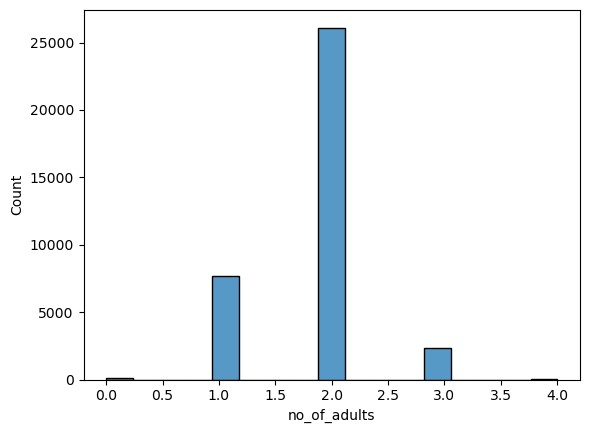

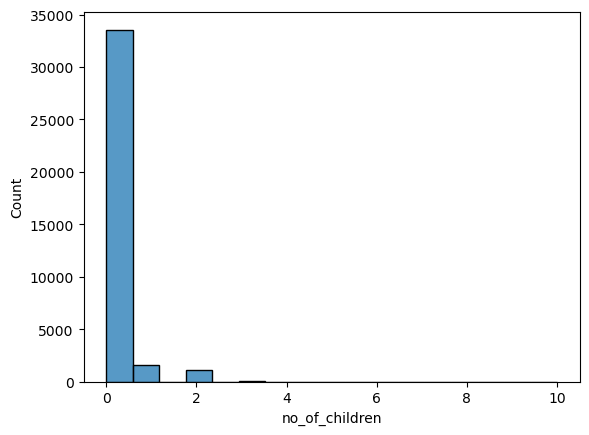

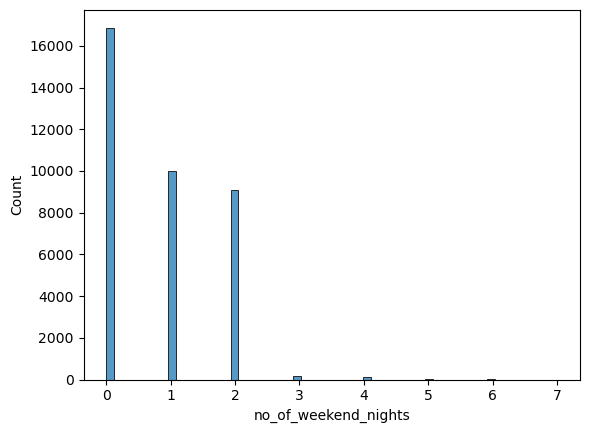

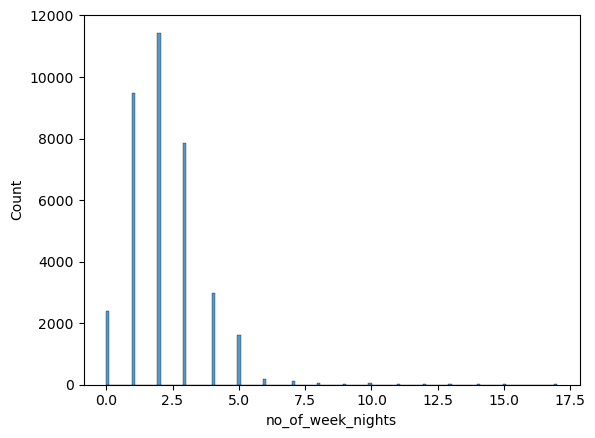

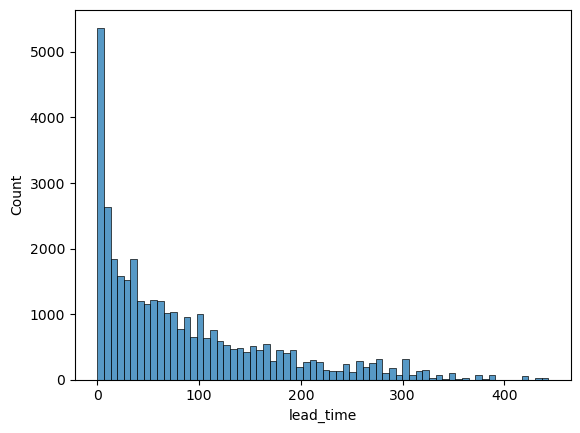

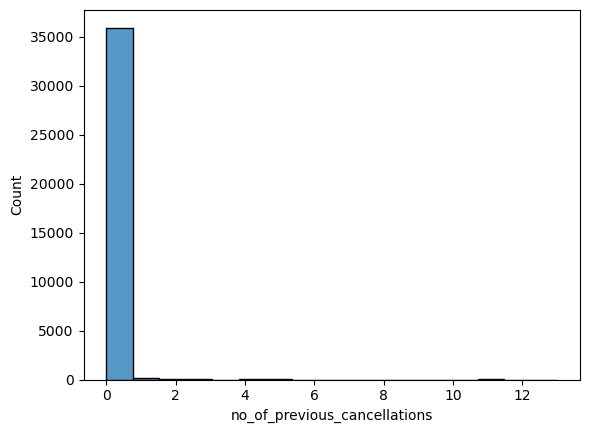

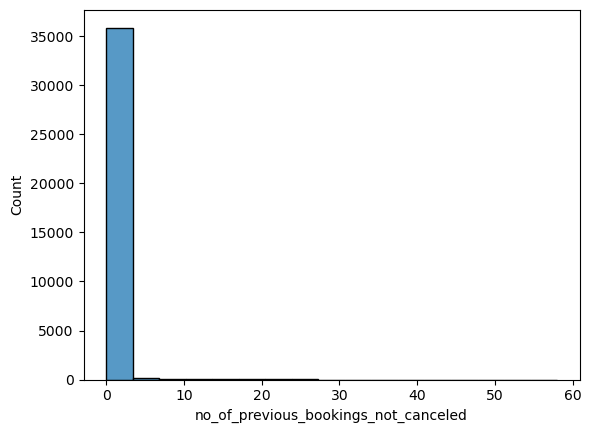

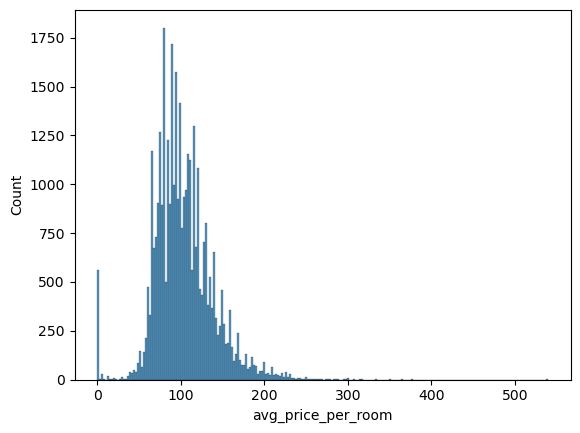

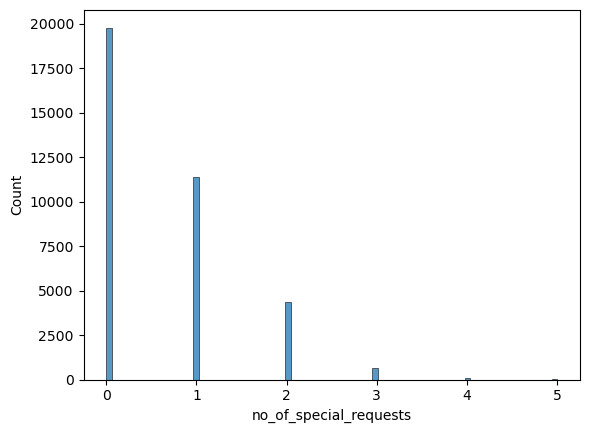

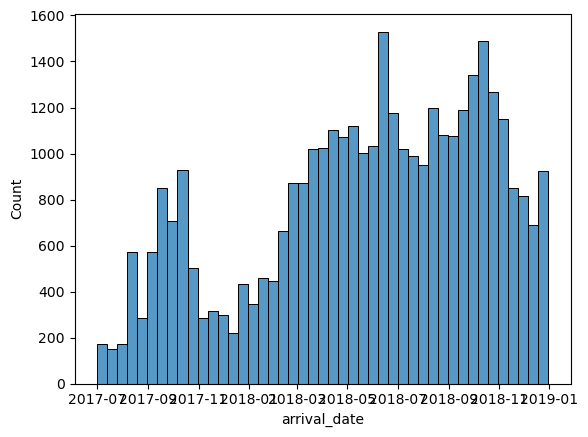

In [6]:
for var in numeric_cols:
    ax = sns.histplot(df, x=var)
    plt.show()

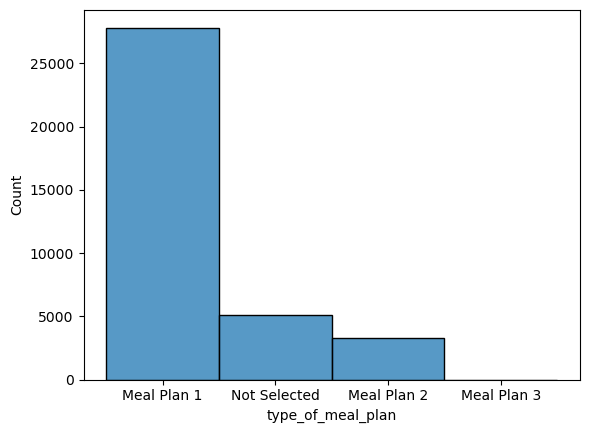

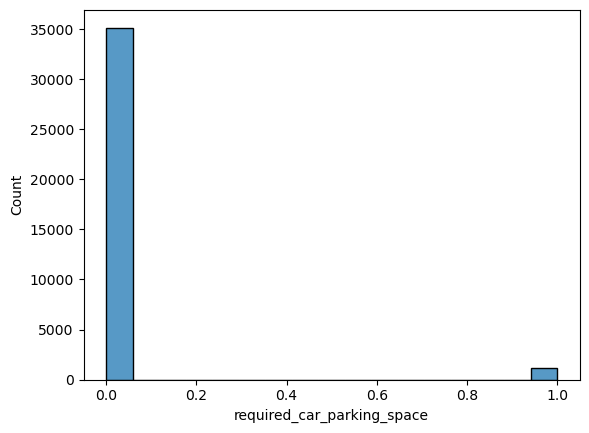

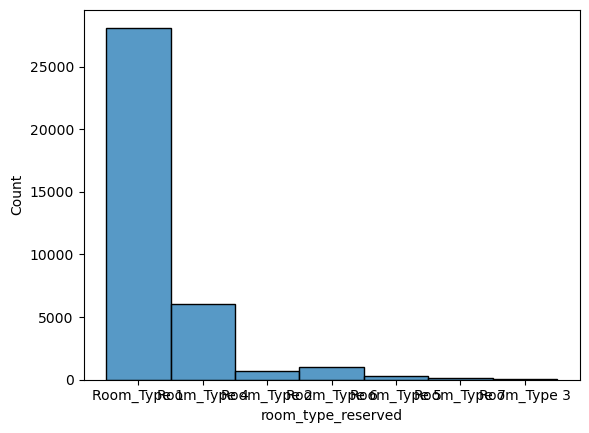

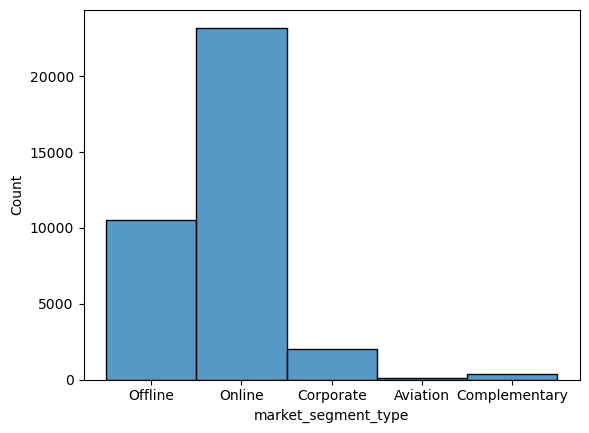

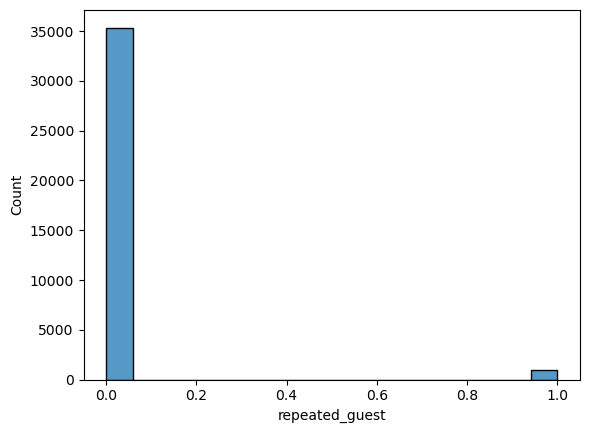

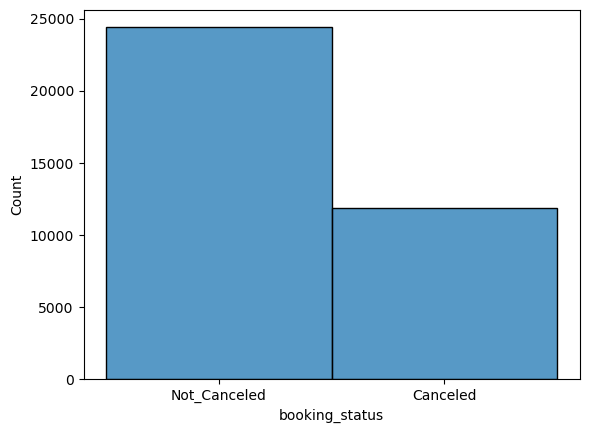

In [7]:
for var in cat_cols:
    ax = sns.histplot(df, x=var)
    plt.show()

In [8]:
dummies = pd.DataFrame()
for cat_var in cat_cols:
    dummies = pd.concat([dummies, pd.get_dummies(df[cat_var], drop_first=True)], axis=1)
dummies.head()

,Meal Plan 2,Meal Plan 3,Not Selected,1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Complementary,Corporate,Offline,Online,1,Not_Canceled
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False


In [9]:
df_dummified = pd.concat([df, dummies], axis=1).drop(cat_cols, axis=1)
df_dummified.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Complementary,Corporate,Offline,Online,1,Not_Canceled
0,INN00001,2,0,1,2,224,2017-10-02,0,0,65.00,...,False,False,False,False,False,False,True,False,False,True
1,INN00002,2,0,2,3,5,2018-11-06,0,0,106.68,...,False,False,False,False,False,False,False,True,False,True
2,INN00003,1,0,2,1,1,2018-02-28,0,0,60.00,...,False,False,False,False,False,False,False,True,False,False
3,INN00004,2,0,0,2,211,2018-05-20,0,0,100.00,...,False,False,False,False,False,False,False,True,False,False
4,INN00005,2,0,1,1,48,2018-04-11,0,0,94.50,...,False,False,False,False,False,False,False,True,False,False


In [10]:
corr = df_dummified.drop(['Booking_ID'], axis=1).corr()
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,...,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Complementary,Corporate,Offline,Online,1,Not_Canceled
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.097287,0.023652,-0.047426,-0.119166,0.296886,0.189401,...,0.299972,-0.017421,0.047788,0.051244,-0.072766,-0.287651,-0.082993,0.242919,-0.192277,-0.086920
no_of_children,-0.019787,1.000000,0.029478,0.024398,-0.047091,-0.002909,-0.016390,-0.021189,0.337728,0.124486,...,-0.074656,0.005709,0.650342,0.113705,0.005196,-0.057469,-0.133710,0.154620,-0.036348,-0.033078
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,0.046595,-0.007145,-0.020690,-0.026312,-0.004525,0.060593,...,0.063118,-0.005147,0.013736,-0.005334,-0.057646,-0.106703,-0.058901,0.116152,-0.067107,-0.061563
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,0.149650,-0.000098,-0.030080,-0.049344,0.022753,0.045994,...,0.106852,-0.000491,0.014763,-0.002457,-0.071314,-0.123045,-0.010714,0.080895,-0.099764,-0.092996
lead_time,0.097287,-0.047091,0.046595,0.149650,1.000000,0.023737,-0.045723,-0.078137,-0.062596,-0.101645,...,-0.083503,-0.025642,-0.046615,-0.037052,-0.088917,-0.179068,0.280103,-0.153570,-0.135984,-0.438538
arrival_date,0.023652,-0.002909,-0.007145,-0.000098,0.023737,1.000000,-0.001110,-0.007348,0.019814,0.016505,...,-0.000780,-0.016648,-0.004590,0.002844,-0.006480,-0.016921,-0.003670,0.012611,-0.017314,-0.015487
no_of_previous_cancellations,-0.047426,-0.016390,-0.020690,-0.030080,-0.045723,-0.001110,1.000000,0.468147,-0.063340,-0.003317,...,-0.014735,-0.001044,-0.007696,0.033313,0.052818,0.094360,-0.021243,-0.036647,0.390810,0.033728
no_of_previous_bookings_not_canceled,-0.119166,-0.021189,-0.026312,-0.049344,-0.078137,-0.007348,0.468147,1.000000,-0.113684,0.027377,...,-0.023901,0.019441,-0.007047,0.039796,0.138194,0.265171,-0.051977,-0.107395,0.539156,0.060179
avg_price_per_room,0.296886,0.337728,-0.004525,0.022753,-0.062596,0.019814,-0.063340,-0.113684,1.000000,0.184381,...,0.278966,0.049654,0.371401,0.097593,-0.298325,-0.141842,-0.214874,0.335614,-0.174900,-0.142569
no_of_special_requests,0.189401,0.124486,0.060593,0.045994,-0.101645,0.016505,-0.003317,0.027377,0.184381,1.000000,...,0.126801,-0.030966,0.059980,0.051164,0.034878,-0.122690,-0.339198,0.377446,-0.011820,0.253070


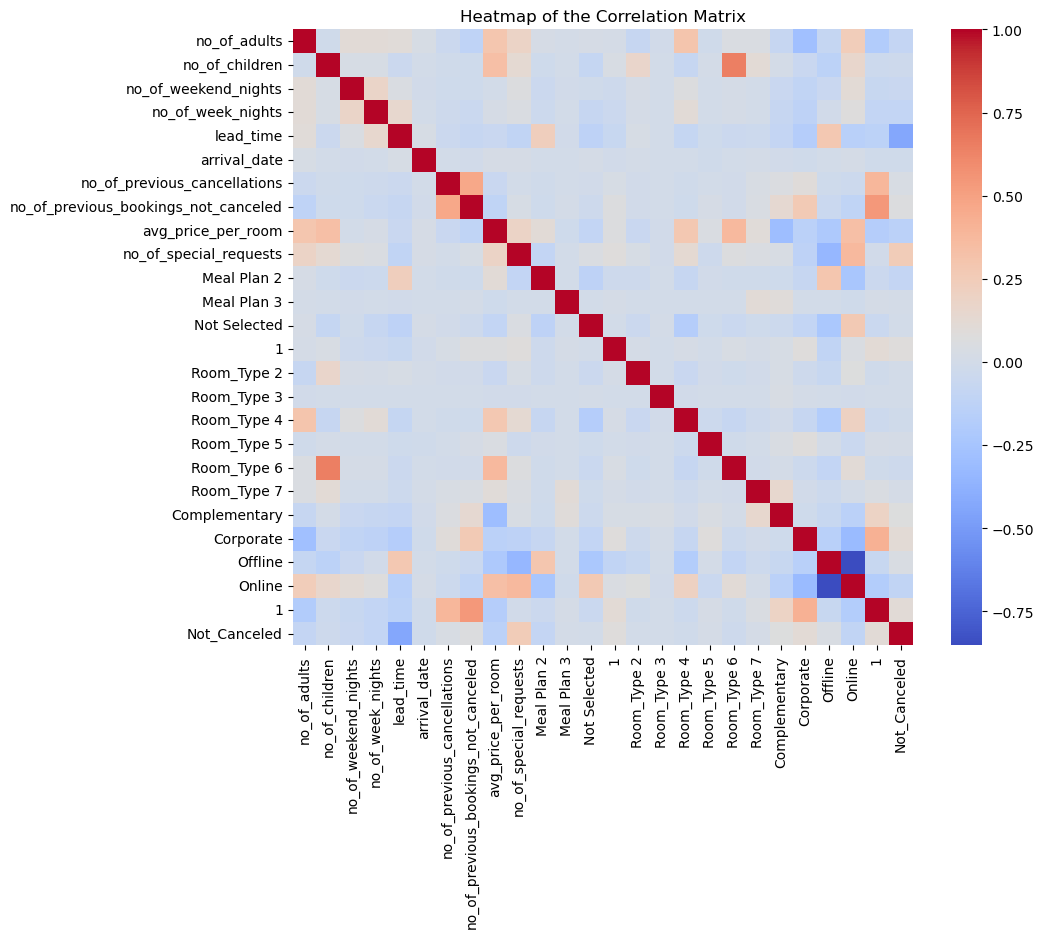

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of the Correlation Matrix')
plt.show()